/var/folders/h5/ydl1chhd0nj3dng49d4f7xnc0000gn/T/ipykernel_52753/494992621.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Value'] = filtered_data['Value'].replace('[\£,]', '', regex=True).astype(float)


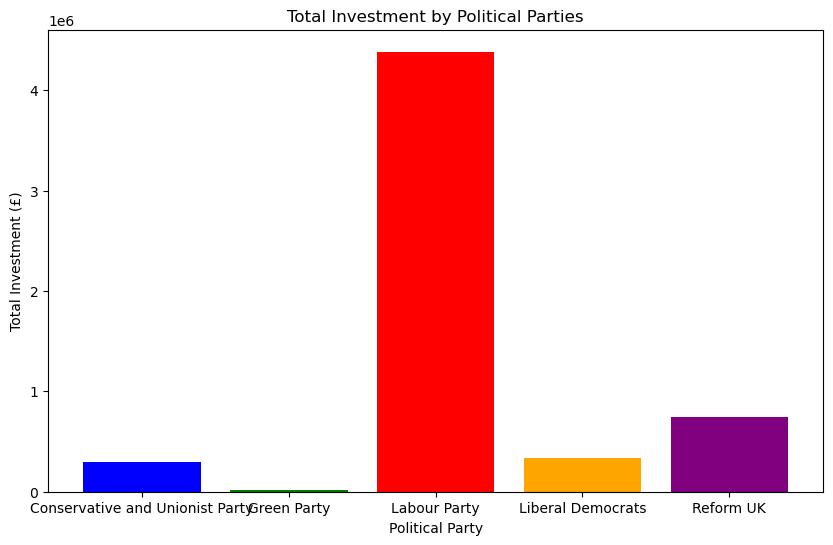

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '../data/Reform_UK_results.csv'
data = pd.read_csv(file_path)

# Filter the data for the relevant parties
parties_of_interest = ['Conservative and Unionist Party', 'Reform UK', 'Labour Party', 'Liberal Democrats', 'Green Party']
filtered_data = data[data['RegulatedEntityName'].isin(parties_of_interest)]

# Clean the 'Value' column
filtered_data['Value'] = filtered_data['Value'].replace('[\£,]', '', regex=True).astype(float)

# Summarize total investments by party
party_investment_summary = filtered_data.groupby('RegulatedEntityName')['Value'].sum().reset_index()

# Create the comparative stacked chart
plt.figure(figsize=(10, 6))
plt.bar(party_investment_summary['RegulatedEntityName'], party_investment_summary['Value'], color=['blue', 'green', 'red', 'orange', 'purple'])
plt.title('Total Investment by Political Parties')
plt.xlabel('Political Party')
plt.ylabel('Total Investment (£)')
plt.show()


/var/folders/h5/ydl1chhd0nj3dng49d4f7xnc0000gn/T/ipykernel_52753/522939920.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Value'] = filtered_data['Value'].replace('[\£,]', '', regex=True).astype(float)


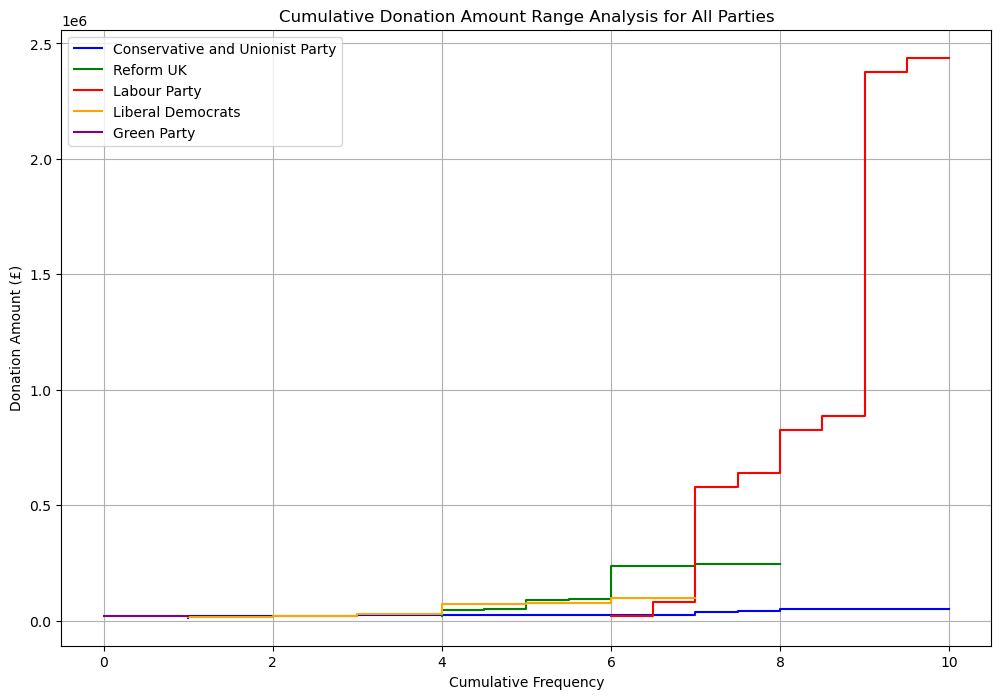

In [22]:

# Filter the data for the relevant parties
parties_of_interest = ['Conservative and Unionist Party', 'Reform UK', 'Labour Party', 'Liberal Democrats', 'Green Party']
filtered_data = data[data['RegulatedEntityName'].isin(parties_of_interest)]

# Clean the 'Value' column
filtered_data['Value'] = filtered_data['Value'].replace('[\£,]', '', regex=True).astype(float)
filtered_data = filtered_data[np.isfinite(filtered_data['Value'])]

# Define colors for each party
colors = {
    'Conservative and Unionist Party': 'blue',
    'Reform UK': 'green',
    'Labour Party': 'red',
    'Liberal Democrats': 'orange',
    'Green Party': 'purple'
}

# Step Plot with Swapped Axes
plt.figure(figsize=(12, 8))

# Plot step plots for each party
for party in parties_of_interest:
    party_data = filtered_data[filtered_data['RegulatedEntityName'] == party]
    values, base = np.histogram(party_data['Value'], bins=40)
    cumulative = np.cumsum(values)
    plt.step(cumulative, base[:-1], where='mid', label=party, color=colors[party])

# Adding titles and labels
plt.title('Cumulative Donation Amount Range Analysis for All Parties')
plt.ylabel('Donation Amount (£)')
plt.xlabel('Cumulative Frequency')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

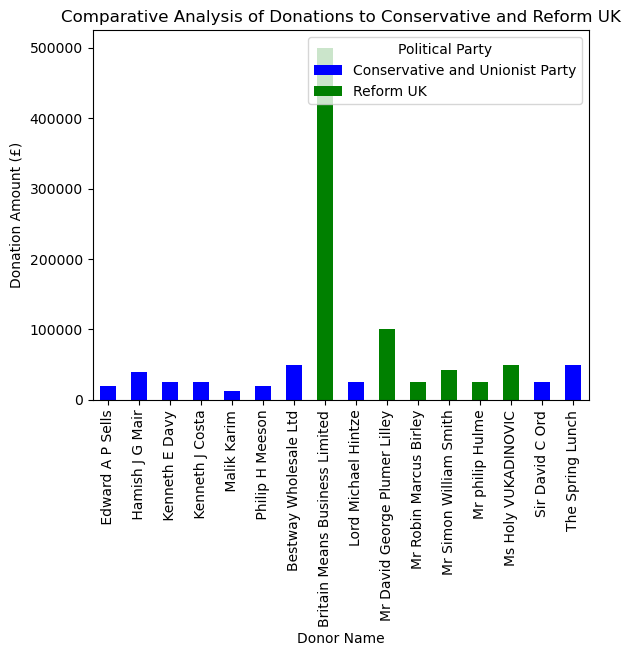

In [3]:
# Filter the data for Conservative and Reform UK parties
conservative_and_reform = filtered_data[filtered_data['RegulatedEntityName'].isin(['Conservative and Unionist Party', 'Reform UK'])]

# Summarize total investments by donor for these two parties
donor_summary_total = conservative_and_reform.groupby(['DonorName', 'RegulatedEntityName'])['Value'].sum().unstack(fill_value=0)

# Create the comparative analysis chart
plt.figure(figsize=(12, 8))
donor_summary_total.plot(kind='bar', stacked=True, color=['blue', 'green'])
plt.title('Comparative Analysis of Donations to Conservative and Reform UK')
plt.xlabel('Donor Name')
plt.ylabel('Donation Amount (£)')
plt.legend(title='Political Party')
plt.show()


<Figure size 1200x800 with 0 Axes>

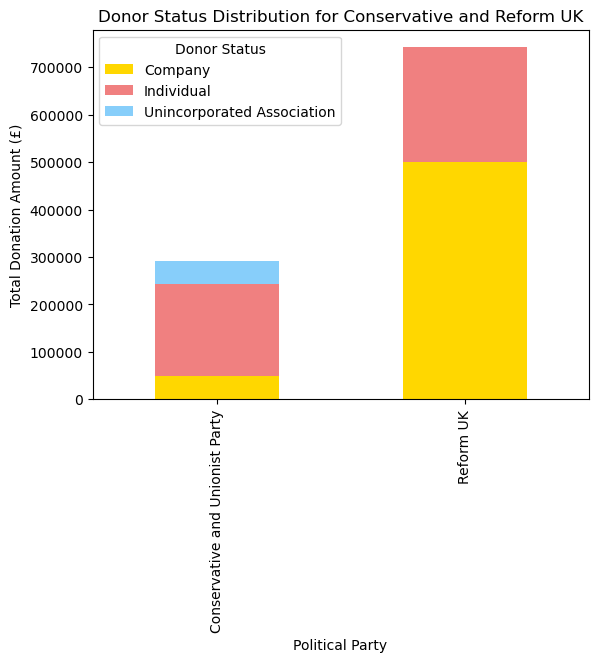

In [4]:
# Create the donor status distribution chart for Conservative and Reform UK
donor_status_summary = conservative_and_reform.groupby(['RegulatedEntityName', 'DonorStatus'])['Value'].sum().unstack(fill_value=0)

# Plot the donor status distribution
plt.figure(figsize=(12, 8))
donor_status_summary.plot(kind='bar', stacked=True, color=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Donor Status Distribution for Conservative and Reform UK')
plt.xlabel('Political Party')
plt.ylabel('Total Donation Amount (£)')
plt.legend(title='Donor Status')
plt.show()


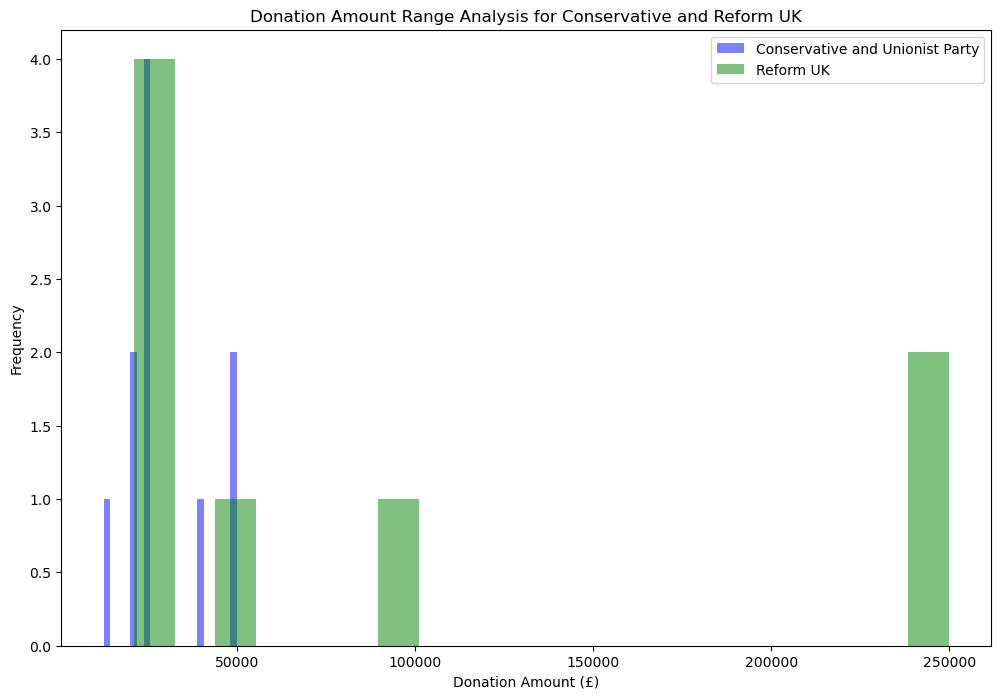

In [6]:
# Plot the distribution of donation amounts for both parties
plt.figure(figsize=(12, 8))

# Creating histograms for each party
plt.hist(conservative_and_reform[conservative_and_reform['RegulatedEntityName'] == 'Conservative and Unionist Party']['Value'], bins=20, alpha=0.5, label='Conservative and Unionist Party', color='blue')
plt.hist(conservative_and_reform[conservative_and_reform['RegulatedEntityName'] == 'Reform UK']['Value'], bins=20, alpha=0.5, label='Reform UK', color='green')

# Adding titles and labels
plt.title('Donation Amount Range Analysis for Conservative and Reform UK')
plt.xlabel('Donation Amount (£)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()
